## Sample of houghLines()

### houghLines()
- 画像内の直線を検出する
- [opencv doc](https://docs.opencv.org/4.4.0/dd/d1a/group__imgproc__feature.html#ga46b4e588934f6c8dfd509cc6e0e4545a)
- pythonコード : `	lines	=	cv.HoughLines(	image, rho, theta, threshold[, lines[, srn[, stn[, min_theta[, max_theta]]]]]	)`

### output
- lines - (\rho, \theta)で表す
    - \rho - 原点からの距離
    - \theta - ラジアン単位の回転角度

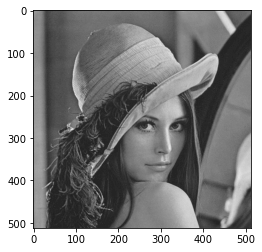

In [14]:
import cv2

import numpy as np
from matplotlib import pyplot as plt

imagePath = "images/lena.png"
# imagePath = "images/sample.png"

img = cv2.imread(imagePath, 0)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.imshow(img, cmap="gray")

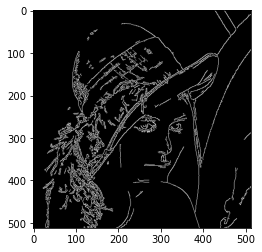

In [15]:
canny = cv2.Canny(img, 100, 200)

plt.imshow(canny, cmap="gray")

## HoughLines()実行前の画像確認

In [16]:
print(type(canny))

print(canny)

<class 'numpy.ndarray'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [17]:
rho = 1
theta = np.pi/180
threshold = 120

lines = cv2.HoughLines(canny, rho, theta, threshold)

In [18]:
print(lines.shape)
print(lines)

(41, 1, 2)
[[[368.           0.7853982 ]]

 [[334.           0.7853982 ]]

 [[332.           0.7853982 ]]

 [[319.           0.9599311 ]]

 [[333.           0.7330383 ]]

 [[310.           0.99483764]]

 [[306.           1.012291  ]]

 [[297.           1.0471976 ]]

 [[324.           0.94247776]]

 [[356.           0.7853982 ]]

 [[304.           1.0297443 ]]

 [[325.           0.5934119 ]]

 [[300.           1.0471976 ]]

 [[339.           1.0646509 ]]

 [[330.           0.7853982 ]]

 [[327.           0.62831855]]

 [[322.           0.9075712 ]]

 [[315.           0.9773844 ]]

 [[318.           0.55850536]]

 [[327.           0.7853982 ]]

 [[356.           0.82030475]]

 [[308.           0.5061455 ]]

 [[313.           0.54105204]]

 [[266.           0.6981317 ]]

 [[325.           0.9075712 ]]

 [[347.           0.6632251 ]]

 [[328.           0.9250245 ]]

 [[321.           0.94247776]]

 [[301.           1.0297443 ]]

 [[326.           0.61086524]]

 [[331.           0.6806784 ]

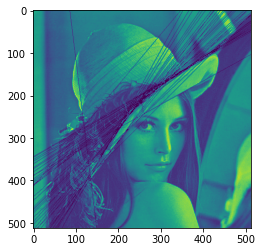

In [20]:
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),1)
    
# 再実行すると、実行前のlinesを上書きしてしまう
    
plt.imshow(img)